# Jupyter Notebook for the problem of the 1st Chapter, Recursive Algorithm, of the course of "Algorithms for optimization inference and learning".

Physics of Complex Systems, Politecnico di Torino.





--------------------------------------------------------------------------------------------------------------
 
Chapter 1: recursion
 
--------------------------------------------------------------------------------------------------------------

In [1]:
#Header files needed

#using Plots;
using PyPlot;
include("recursion.jl");

┌ Info: Recompiling stale cache file /Users/ernesto/.julia/compiled/v1.2/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1240


- Problem 3 (Sierpinski’s triangle)

Design a recursion to produce plot in Figure 1.1 (on the book).
(Hint: using a recursive function, produce vectors $p_x$, $p_y$ with respectively $x$ an $y$ coordinates of endpoints of your polygons using, separated by $NaN$ values. Then plot it.)





recursion.jl $\rightarrow$ function *s_triangle()*

In [4]:
p_x, p_y = s_triangle(128)[1], s_triangle(128)[2];

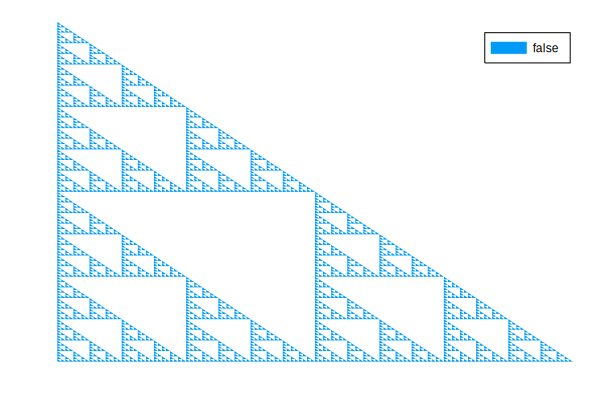

In [3]:
gr();
plot(p_x,p_y,seriestype=:shape,linewidth=-1,grid=false,axis=false,label=false)

In the solution that I've proposed, there is a problem related to the dimension of the triangle: it works well if the dimension $x$ is a power of 2, $x=2^n$, otherwise the algorithm doesn't work well. I know that the problem is in the part related to the recursive calls (I use to apply the recursive call to each part of dimension $\frac{x}{2}$, iterating the halving). I'll try to fix this.

- Problem 7 (In-place Quick Sort)

Design a recursive algorithm version (in-place) for the Quick Sort, in which arguments are the indices $(i,dim)$ into the original vector.

recursion.jl $\rightarrow$ function *qsort()*

In [20]:
V_1 = rand(1000);

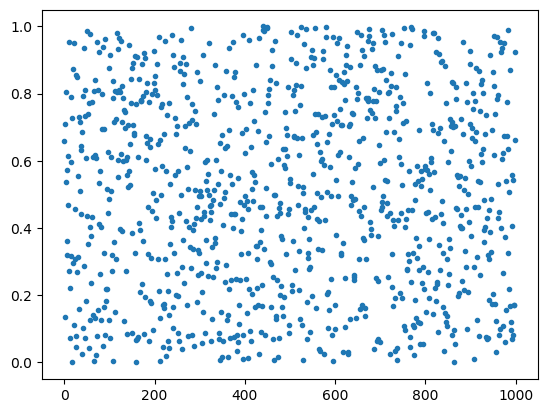

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1388cd810>

In [21]:
plot(V_1, ".")

In [22]:
V_2 = qsort(V_1);

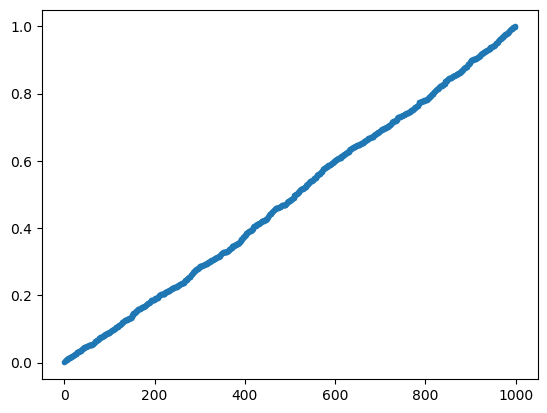

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13a676d50>

In [23]:
plot(v_1, ".")

- Problem 8 (Computing the arg)

How can we extend the recursion in *Example 4* to compute the actual values $(i^*, j^*)$, the argument of the $max$ ?

*Example 4 (Maximum sub-array problem)*: Given an array of numbers $v_1,\dots,v_n$, find $i,j$ such that $\sum_{k=i}^jv_k$ is maximum. Since it is problematic to design a recursive algorithm to solve the problem, we will "generalize" or "enrich" a bit our problem. Call $M_j = \max \left\{ \sum_{i\leq k \leq j} v_k : i\leq j+1 \right\}$ the maximum sum ending in $v_j$, with the convention that $\sum_\emptyset = 0$. It is clear that $M_j$ obeys the recursion $M_j = v_j + \max \left\{ M_{j-1} ,0 \right\}$. One we computed all values of $M_j$ (computational complexity $O(n)$) we can compute our maximum as $R_j = \max_{i \leq j} M_j$ (again in computational complexity $O(n)$).

recursion.jl $\rightarrow$ function *max_sum()*

In [24]:
V_3=rand(-100:100, 1000);

In [25]:
max_sum(V_3)

191

In [24]:
#function max_sum_2(V)
#    j = length(V)
#    A = zeros(length(V), 2)
#    A[:,1] = V
#    A[:,2] = 1:j
#    function sum_mj_2(A,j=length(A))
#        if j == 1
#            return A[j,j]
#        else
#            return A[j,j] + max(0,sum_mj_2(A,j-1))
#        end
#    end
#    return maximum(sum_mj_2(A[i:i+1,i:i+1]) for i=1:length(A)-1)
#end

 - Problem 9 (Two-dimensional maximum subarray)

Formulate and solve a two-dimensional variant of Example 4.

In a $2$-dimensional variant of *Example 4*, given a matrix of numbers $$v = \begin{bmatrix}
v_{11} & v_{12} \\
\vdots & \vdots \\
v_{n1} & v_{n2} \\
\end{bmatrix},$$ find $i,j$ such that $\sum_{k=i}^{j}v_{k k'},\ \text{where}\ k' = 1,2$, is maximum. Since we are in the $2$-dimensional case, so there are some "restrictions": we can find the "neighbors" on the $1$-st column, on the $2$-nd one or in one of $n$-rows of the matrix.

recursion.jl $\rightarrow$ function *max_sum_2d()*

In [26]:
V_4=rand(-100:100,1000,2);

In [27]:
max_sum_2d(V_4)

190

- Problem 10 (Divide-and-Conquer maximum subarray)

When possible, a binary division of the problem as in MergeSort may be preferable to tail recursion, as the computation can be parallelized on a computer. Instead of tail recursion, devise a binary divide-and-conquer approach to solve *Example 4*.

recursion.jl $\rightarrow$ function *max_sum_bin()*

In [28]:
V_5 = rand(-100:100,1000);

In [31]:
max_sum_bin(V_5), max_sum(V_5)

(182, 182)

- Problem 11 (Recursive subsets)


Design a recursive function to print the $b$-subsets of $\{1,\dots,n\}$ of size $k$, where $b$ is the binomial $(n,k)$.

Let's consider the starting set of elements $v = \{1,...,n\}$. The idea is to choose an element among the $n$-ones and delete it from the set $v$. So, it's needed to repeat this procedure $k$-times, in order to have the first substet $b_1 \subset v=\{1,...,n\}$ given by $k$-random elements. This should be iterated while there are elements in the modified set.
After this, we must pass to the second element of the starting set $v = \{1,...,n\}$, in order to do the same as above. In this way, it's possible to solve the problem?

The idea of the recursion's tree is: